In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from scipy.stats import f_oneway
from scipy.stats import ttest_ind

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import shap

import sys
sys.path.append("../scripts")

import preprocessing as dp
import data_extraction as de
import exploratory_analysis as eda

### ***Load Data***

In [2]:
df = de.load_data('../data/csv.csv')

d:\Personal Files\KIAM Notebooks\KIAM-Week3\notebooks\../scripts\data_extraction.py:11: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(


Data Loaded Successfully


In [3]:
df.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,3/1/2015 0:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
1,145249,12827,5/1/2015 0:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
2,145249,12827,7/1/2015 0:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0
3,145255,12827,5/1/2015 0:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0
4,145255,12827,7/1/2015 0:00,True,NaN,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0


### ***Data Preprocessing***

In [4]:
## Initialize the pre processing class

data_preprocessing = dp.DataPreprocessing(df)

In [5]:
## Drop Highly empty columns
data_preprocessing.drop_highly_empty_columns()

Highly empty columns dropped: ['Citizenship', 'CustomValueEstimate', 'WrittenOff', 'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet']


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,LegalType,Title,Language,Bank,AccountType,MaritalStatus,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,3/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
1,145249,12827,5/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
2,145249,12827,7/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0
3,145255,12827,5/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0
4,145255,12827,7/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,4/1/2015 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0
1000094,31520,389,6/1/2015 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0
1000095,31520,389,8/1/2015 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0
1000096,31519,389,7/1/2014 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0


In [6]:
## Impute categorical data with mode
data_preprocessing.impute_categorical_data()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,LegalType,Title,Language,Bank,AccountType,MaritalStatus,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,3/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
1,145249,12827,5/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
2,145249,12827,7/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0
3,145255,12827,5/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0
4,145255,12827,7/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,4/1/2015 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0
1000094,31520,389,6/1/2015 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0
1000095,31520,389,8/1/2015 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0
1000096,31519,389,7/1/2014 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0


In [7]:
## Impute numercical data with mean
data_preprocessing.impute_numerical_data()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,LegalType,Title,Language,Bank,AccountType,MaritalStatus,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,3/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
1,145249,12827,5/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
2,145249,12827,7/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0
3,145255,12827,5/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0
4,145255,12827,7/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,4/1/2015 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0
1000094,31520,389,6/1/2015 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0
1000095,31520,389,8/1/2015 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0
1000096,31519,389,7/1/2014 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0


In [8]:
# duplicated values
df.duplicated().sum()

np.int64(75)

In [9]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

In [10]:
# Drop rows with missing values
df.dropna()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,LegalType,Title,Language,Bank,AccountType,MaritalStatus,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,3/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
1,145249,12827,5/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0
2,145249,12827,7/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0
3,145255,12827,5/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0
4,145255,12827,7/1/2015 0:00,True,Close Corporation,Mr,English,First National Bank,Current account,Not specified,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,4/1/2015 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0
1000094,31520,389,6/1/2015 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0
1000095,31520,389,8/1/2015 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Third Party,Third Party,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,347.235175,0
1000096,31519,389,7/1/2014 0:00,False,Individual,Mr,English,ABSA Bank,Savings account,Single,...,No excess,Passenger Liability,Passenger Liability,Comprehensive - Taxi,Motor Comprehensive,Mobility Commercial Cover: Monthly,Commercial,IFRS Constant,2.315000,0


In [11]:
## Check for missing values
df.isna().sum()

UnderwrittenCoverID           0
PolicyID                      0
TransactionMonth              0
IsVATRegistered               0
LegalType                     0
Title                         0
Language                      0
Bank                          0
AccountType                   0
MaritalStatus                 0
Gender                        0
Country                       0
Province                      0
PostalCode                    0
MainCrestaZone                0
SubCrestaZone                 0
ItemType                      0
mmcode                        0
VehicleType                   0
RegistrationYear              0
make                          0
Model                         0
Cylinders                     0
cubiccapacity                 0
kilowatts                     0
bodytype                      0
NumberOfDoors                 0
VehicleIntroDate            552
AlarmImmobiliser              0
TrackingDevice                0
CapitalOutstanding            2
NewVehic

In [12]:
## Feature Engineering

## Add a Profit Column
df['Profit'] = df['TotalPremium'] - df['TotalClaims']

## Add Claim to Premium ratio
df['claim_to_premium_ratio'] = df['TotalClaims']/(df['TotalPremium']+1)

In [13]:
# Convert 'TransactionMonth' 
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'], errors='coerce')
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')

# Extract features from datetime columns
df['TransactionMonth_Year'] = df['TransactionMonth'].dt.year
df['TransactionMonth_Month'] = df['TransactionMonth'].dt.month
df['VehicleIntroDate_Year'] = df['VehicleIntroDate'].dt.year
df['VehicleIntroDate_Month'] = df['VehicleIntroDate'].dt.month
df = df.drop(columns=['TransactionMonth', 'VehicleIntroDate'])

C:\Users\wasihunt\AppData\Local\Temp\ipykernel_1352\1191713088.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')


In [14]:
df.dropna(inplace=True)

In [15]:
categorical_columns = df.select_dtypes(include=['object','bool']).columns.tolist()
df_encoded = pd.get_dummies(df, columns = categorical_columns, drop_first=True)
df_encoded 

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CapitalOutstanding,...,CoverGroup_Standalone passenger liability,CoverGroup_Third Party Only,CoverGroup_Trailer,Section_Motor Comprehensive,Section_Optional Extended Covers,Section_Standalone passenger liability,"Section_Third party or third party, fire and theft only",Product_Mobility Commercial Cover: Monthly,Product_Mobility Metered Taxis: Monthly,Product_Standalone Passenger Liability
0,145249,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,...,False,False,False,True,False,False,False,False,True,False
1,145249,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,...,False,False,False,True,False,False,False,False,True,False
2,145249,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,...,False,False,False,True,False,False,False,False,True,False
3,145255,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,...,False,False,False,True,False,False,False,False,True,False
4,145255,12827,1459,44069150.0,2004,6.0,2597.0,130.0,4.0,119300.0,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000093,31520,389,7493,4614100.0,2013,4.0,2693.0,110.0,4.0,0.0,...,False,False,False,True,False,False,False,True,False,False
1000094,31520,389,7493,4614100.0,2013,4.0,2693.0,110.0,4.0,0.0,...,False,False,False,True,False,False,False,True,False,False
1000095,31520,389,7493,4614100.0,2013,4.0,2693.0,110.0,4.0,0.0,...,False,False,False,True,False,False,False,True,False,False
1000096,31519,389,7493,4614100.0,2013,4.0,2693.0,110.0,4.0,0.0,...,False,False,False,True,False,False,False,True,False,False


In [16]:
df_encoded = df_encoded.astype({col: 'uint8' for col in df_encoded.select_dtypes('bool').columns})

In [17]:
df_encoded.dtypes

UnderwrittenCoverID                                          int64
PolicyID                                                     int64
PostalCode                                                   int64
mmcode                                                     float64
RegistrationYear                                             int64
                                                            ...   
Section_Standalone passenger liability                       uint8
Section_Third party or third party, fire and theft only      uint8
Product_Mobility Commercial Cover: Monthly                   uint8
Product_Mobility Metered Taxis: Monthly                      uint8
Product_Standalone Passenger Liability                       uint8
Length: 668, dtype: object

### ***Train Test Split***

In [18]:
## Define target and features
X = df_encoded.drop(['TotalPremium', 'TotalClaims'], axis=1)
y_premium = df_encoded['TotalPremium']
y_claims = df_encoded['TotalClaims']


# Split data for TotalPremium
X_train_premium, X_test_premium, y_train_premium, y_test_premium = train_test_split(X, y_premium, test_size=0.2, random_state=42)

# Split data for TotalClaims
X_train_claims, X_test_claims, y_train_claims, y_test_claims = train_test_split(X, y_claims, test_size=0.2, random_state=42)

### ***Model Building***

#### ***Linear Regression Model***

##### ***Premium Prediction***

In [19]:
# Model for TotalPremium
model_premium_lr = LinearRegression()
model_premium_lr.fit(X_train_premium, y_train_premium)
y_pred_premium_lr = model_premium_lr.predict(X_test_premium)

In [20]:
# Calculate Metrics
mse_premium_lr = mean_squared_error(y_test_premium, y_pred_premium_lr)
mae_premium_lr = mean_absolute_error(y_test_premium, y_pred_premium_lr)
r2_premium_lr = r2_score(y_test_premium, y_pred_premium_lr)

# Evaluate
print(f"TotalPremium - MSE: {mse_premium_lr}, R^2: {r2_premium_lr}, MAE: {mae_premium_lr}")

TotalPremium - MSE: 10838.291748764714, R^2: 0.5645720437648727, MAE: 50.93459588510656


##### ***SHAP Explainer***

In [21]:
explainer = shap.Explainer(model_premium_lr, X_train_premium)
shap_values = explainer(X_test_premium)

LinearExplainer explainer: 199895it [00:22, 1978.98it/s]                             


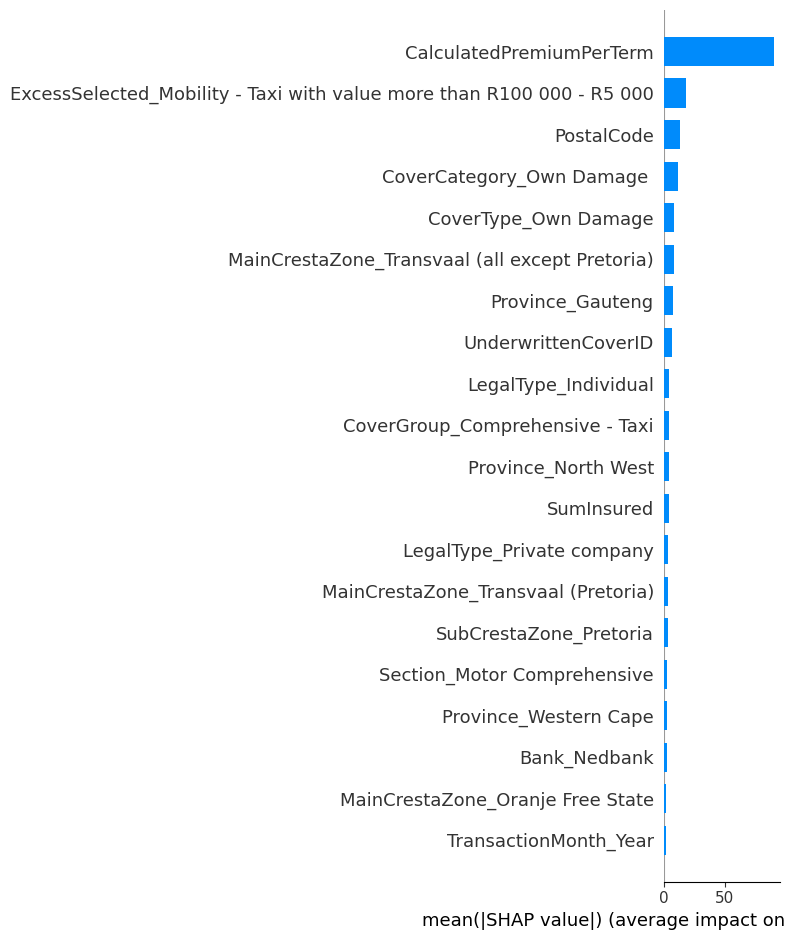

In [22]:
## Summary Plot
shap.summary_plot(shap_values, X_test_premium, plot_type='bar')

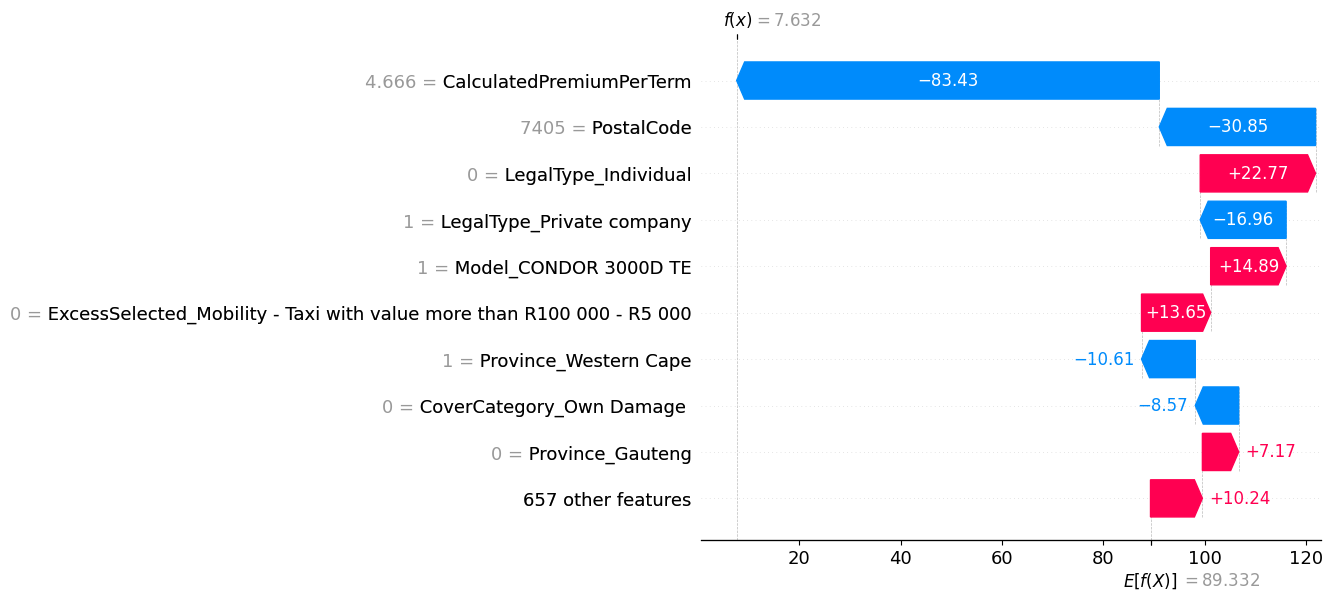

In [23]:
# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

#### ***Claim Prediction***

In [24]:
# Model for TotalClaims
model_claims_lr = LinearRegression()
model_claims_lr.fit(X_train_claims, y_train_claims)
y_pred_claims_lr = model_claims_lr.predict(X_test_claims)

In [25]:
# Calculate metrics
mse_claims_lr = mean_squared_error(y_test_claims, y_pred_claims_lr)
mae_claims_lr = mean_absolute_error(y_test_claims, y_pred_claims_lr)
r2_claims_lr = r2_score(y_test_claims, y_pred_claims_lr)

print(f"TotalPremium - MSE: {mse_claims_lr}, R^2: {r2_claims_lr}, MAE: {mae_claims_lr}")

TotalPremium - MSE: 10838.291748764523, R^2: 0.9965166833864757, MAE: 50.934595885066244


##### ***SHAP Explainer***

In [26]:
## Initialize Shap explainer
explainer = shap.Explainer(model_claims_lr, X_train_claims)
shap_values = explainer(X_test_claims)

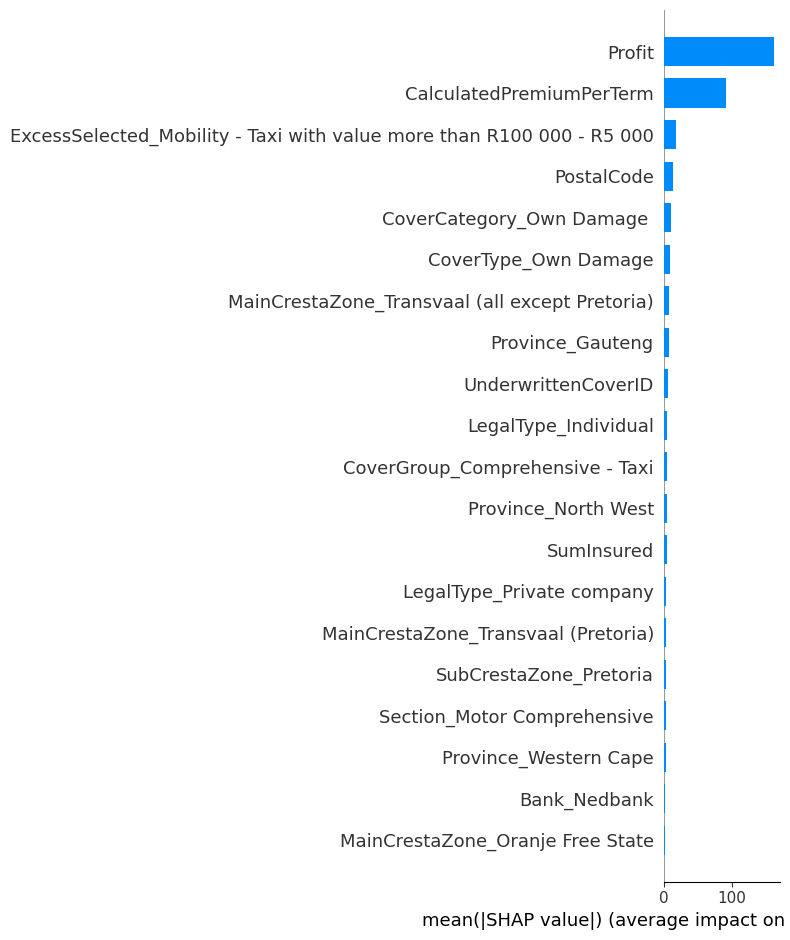

In [27]:
## Summary Plot
shap.summary_plot(shap_values, X_test_claims, plot_type='bar')

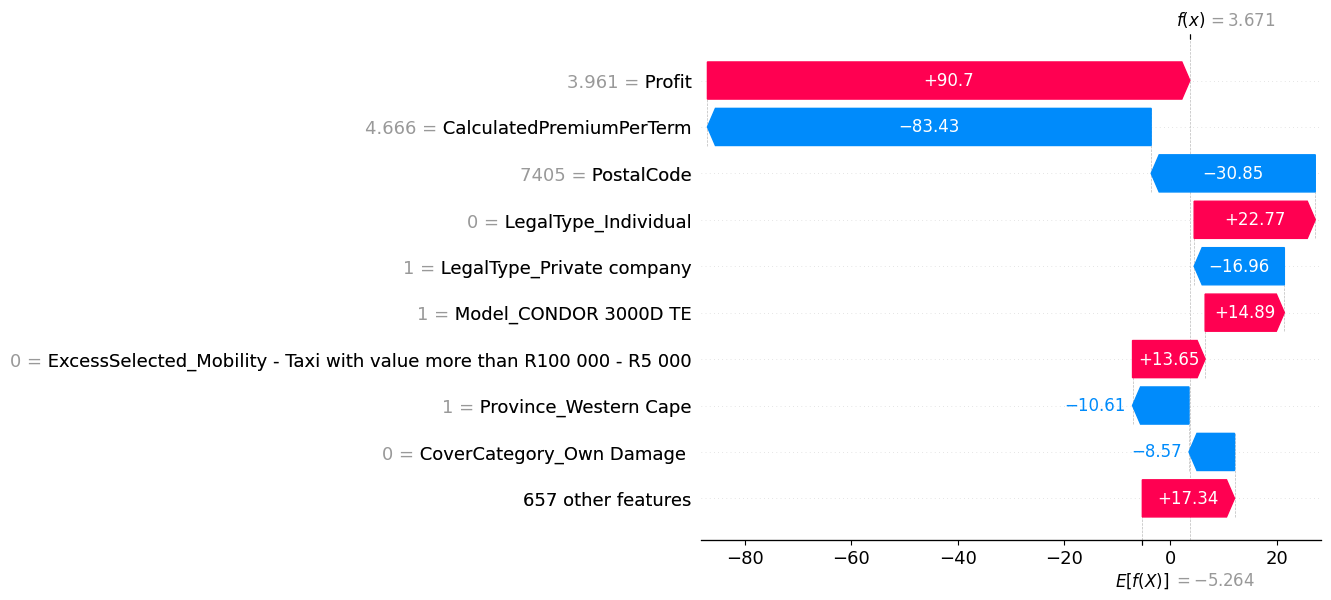

In [28]:
# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

### ***Decision Trees Model***

##### ***Premium Prediciton***

In [29]:
# Model for TotalPremium
model_premium_dt = DecisionTreeRegressor()
model_premium_dt.fit(X_train_premium, y_train_premium)
y_pred_premium_dt = model_premium_dt.predict(X_test_premium)

In [ ]:
# Calculate Metrics
mse_premium_dt = mean_squared_error(y_test_premium, y_pred_premium_dt)
mae_premium_dt = mean_absolute_error(y_test_premium, y_pred_premium_dt)
r2_premium_dt = r2_score(y_test_premium, y_pred_premium_dt)

print(f"TotalPremium - MSE: {mse_premium_dt}, R^2: {r2_premium_dt}, MAE: {mae_premium_dt}")

#### ***SHAP Explainer***

In [ ]:
explainer = shap.Explainer(model_premium_dt, X_train_premium)
shap_values = explainer(X_test_premium)

In [ ]:
## Summary Plot
shap.summary_plot(shap_values, X_test_premium, plot_type = "bar")

In [ ]:
# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

##### ***Claim Prediction***

In [29]:
# Model for TotalClaims
model_claims_dt = DecisionTreeRegressor()
model_claims_dt.fit(X_train_claims, y_train_claims)
y_pred_claims_dt = model_claims_dt.predict(X_test_claims)

In [ ]:
# Calculate Metrics
mse_claims_dt = mean_squared_error(y_test_claims, y_pred_claims_dt)
mae_claims_dt = mean_absolute_error(y_test_claims, y_pred_claims_dt)
r2_claims_dt = r2_score(y_test_claims, y_pred_claims_dt)

print(f"TotalPremium - MSE: {mse_claims_dt}, R^2: {r2_claims_dt}, MAE: {mae_claims_dt}")

#### ***SHAP Explainer***

In [ ]:
## Initialize Shap explainer
explainer = shap.Explainer(model_claims_dt, X_train_claims)
shap_values = explainer(X_test_claims)

In [ ]:
## Summary Plot
shap.summary_plot(shap_values, X_test_claims, plot_type='bar')

In [ ]:
# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

### ***Random Forest Model***

#### ***Premium Prediction***

In [32]:
# Model for TotalPremium
model_premium_rf = RandomForestRegressor()
model_premium_rf.fit(X_train_premium, y_train_premium)
y_pred_premium_rf = model_premium_rf.predict(X_test_premium)

In [ ]:
# Calculate Metrics
mse_premium_rf = mean_squared_error(y_test_premium, y_pred_premium_rf)
mae_premium_rf = mean_absolute_error(y_test_premium, y_pred_premium_rf)
r2_premium_rf = r2_score(y_test_premium, y_pred_premium_rf)

print(f"TotalPremium - MSE: {mse_premium_rf}, R^2: {r2_premium_rf}, MAE: {mae_premium_rf}")

#### ***SHAP Explainer***

In [ ]:
explainer = shap.Explainer(model_premium_rf, X_train_premium)
shap_values = explainer(X_test_premium)

In [ ]:
## Summary Plot
shap.summary_plot(shap_values, X_test_premium, plot_type = "bar")

In [ ]:
# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

#### ***Claim Prediction***

In [34]:
# Model for TotalClaims
model_claims_rf = RandomForestRegressor()
model_claims_rf.fit(X_train_claims, y_train_claims)
y_pred_claims_rf = model_claims_rf.predict(X_test_claims)

In [ ]:
# Calculate Metrics
mse_claims_rf = mean_squared_error(y_test_claims, y_pred_claims_rf)
mae_claims_rf = mean_absolute_error(y_test_claims, y_pred_claims_rf)
r2_claims_rf = r2_score(y_test_claims, y_pred_claims_rf)

print(f"TotalPremium - MSE: {mse_claims_rf}, R^2: {r2_claims_rf}, MAE: {mae_claims_rf}")

#### ***SHAP Explainer***

In [ ]:
## Initialize Shap explainer
explainer = shap.Explainer(model_claims_rf, X_train_claims)
shap_values = explainer(X_test_claims)

In [ ]:
## Summary Plot
shap.summary_plot(shap_values, X_test_claims, plot_type='bar')

In [ ]:
# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

### ***XGboost Model***

#### ***Premium Prediction***

In [36]:
# Model for TotalPremium
model_premium_xgb = xgb.XGBRegressor()
model_premium_xgb.fit(X_train_premium, y_train_premium)
y_pred_premium_xgb = model_premium_xgb.predict(X_test_premium)

In [ ]:
# Calculate Metrics
mse_premium_xgb = mean_squared_error(y_test_premium, y_pred_premium_xgb)
mae_premium_xgb = mean_absolute_error(y_test_premium, y_pred_premium_xgb)
r2_premium_xgb = r2_score(y_test_premium, y_pred_premium_xgb)

print(f"TotalPremium - MSE: {mse_premium_xgb}, R^2: {r2_premium_xgb}, MAE: {mae_premium_xgb}")


#### ***SHAP Explainer***

In [ ]:
explainer = shap.Explainer(model_premium_xgb, X_train_premium)
shap_values = explainer(X_test_premium)

In [ ]:
## Summary Plot
shap.summary_plot(shap_values, X_test_premium, plot_type = "bar")

In [ ]:
# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

#### ***Claims Prediction***

In [41]:
# Model for TotalClaims
model_claims_xgb = xgb.XGBRegressor()
model_claims_xgb.fit(X_train_claims, y_train_claims)
y_pred_claims_xgb = model_claims_xgb.predict(X_test_claims)

In [ ]:
# Calculate Metrics
mse_claims_xgb = mean_squared_error(y_test_claims, y_pred_claims_xgb)
mae_claims_xgb = mean_absolute_error(y_test_claims, y_pred_claims_xgb)
r2_claims_xgb = r2_score(y_test_claims, y_pred_claims_xgb)

print(f"TotalPremium - MSE: {mse_claims_xgb}, R^2: {r2_claims_xgb}, MAE: {mae_claims_xgb}")

#### ***SHAP Explainer***

In [ ]:
explainer = shap.Explainer(model_claims_xgb, X_train_claims)
shap_values = explainer(X_test_claims)

In [ ]:
## Summary Plot
shap.summary_plot(shap_values, X_test_claims, plot_type = "bar")

In [ ]:
# Waterfall plot for the first observation
shap.waterfall_plot(shap_values[0])

### ***Model Comparison***

In [ ]:
# Create a summary of model performance
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'TotalPremium_MSE': [
        mean_squared_error(y_test_premium, y_pred_premium_lr),
        mean_squared_error(y_test_premium, y_pred_premium_dt),
        mean_squared_error(y_test_premium, y_pred_premium_rf),
        mean_squared_error(y_test_premium, y_pred_premium_xgb)
    ],
    'TotalClaims_MSE': [
    mean_squared_error(y_test_claims, y_pred_claims_lr),
    mean_squared_error(y_test_claims, y_pred_claims_dt),
    mean_squared_error(y_test_claims, y_pred_claims_rf),
    mean_squared_error(y_test_claims, y_pred_claims_xgb)
],
'TotalPremium_R2': [
    r2_score(y_test_premium, y_pred_premium_lr),
    r2_score(y_test_premium, y_pred_premium_dt),
    r2_score(y_test_premium, y_pred_premium_rf),
    r2_score(y_test_premium, y_pred_premium_xgb)
],
'TotalClaims_R2': [
    r2_score(y_test_claims, y_pred_claims_lr),
    r2_score(y_test_claims, y_pred_claims_dt),
    r2_score(y_test_claims, y_pred_claims_rf),
    r2_score(y_test_claims, y_pred_claims_xgb)
]
})

results